# This is an initial trial with SKLearn based K-Means on the AWS platform

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# # Load the data from an RDS database - cell content provided by SHa
# from sqlalchemy import create_engine

# db = create_engine('mysql+pymysql://{user}:{password}@{host}/{database}' \
#                    .format(host='fjs-project.cpfawmiirogo.eu-central-1.rds.amazonaws.com',
#                            user='admin', password='fjs-project', database='fjs-db'))

# data = pd.read_sql_table('joined', db, index_col='track_id')

# data.head()

In [3]:
# Load the dataset from csv file.
data = pd.read_csv('joined.csv', sep=",", header=0, index_col=0) #, nrows=1000) # Don't forget: nrows is currently set at 1000
data.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,100,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,Travis Scott,HIGHEST IN THE ROOM,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,98,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,Tones and I,Dance Monkey,98,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4


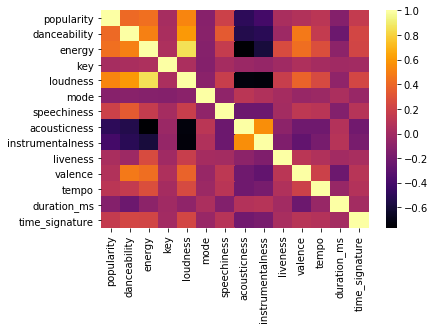

In [4]:
# Use Seaborn to visualize correlations
sns.heatmap(data.corr(), cmap='inferno')
plt.show()

# Data Wrangling
This approach is to cluster the titles - we will validate via a manually generated testset

ISSUE 
The non-numeric columns 'artist_name' & 'track_name'are key attributes, however these cannot be processed by the DBSCAN algorithm
In the case of 'artist_name', of the 9320 entries 2626 are unique - this is a large number of columns to generate for one hot encoding.

To avoid this, the two columns will be dropped. Of the multiple methods for this, the listing of individual column names has been opted for.


In [5]:
num_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [6]:
X = data[num_cols]
display(X)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,100,0.764,0.3200,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,99,0.695,0.7620,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,98,0.598,0.4270,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.2250,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,98,0.824,0.5880,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
038gsZG1ObZUtFMkwIJnqH,0,0.311,0.0758,6,-24.592,1,0.0357,0.7680,0.004250,0.0699,0.1690,84.039,117400,4
02UfNUoxphQFSLYQnSzqhM,0,0.267,0.2860,1,-17.582,1,0.0500,0.8880,0.692000,0.0620,0.6040,84.736,356987,4
024szQC1tsQq6UFemGBzo0,0,0.603,0.4890,9,-9.564,1,0.0381,0.9240,0.033100,0.1490,0.7880,89.147,203274,4


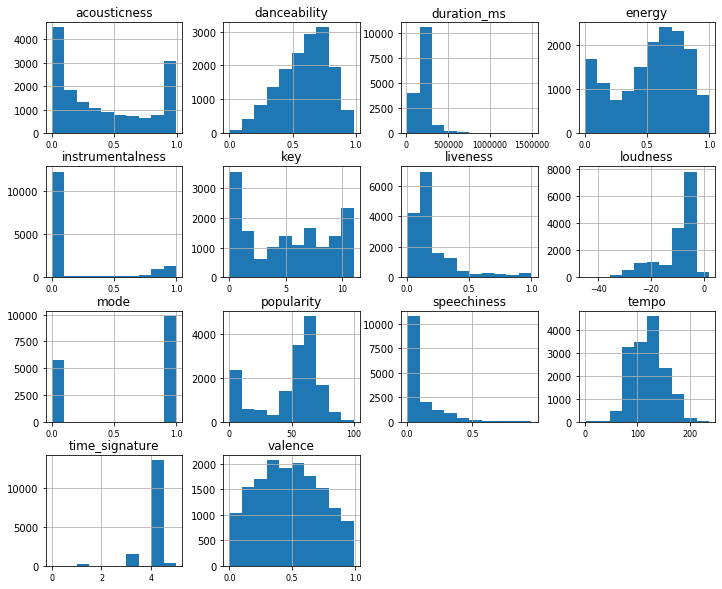

In [7]:
# For clarity the columns will be displayed as a histogram
X.hist(xlabelsize=8, figsize=(12,10));

# Encoding

From the table it is clear that the value ranges of the columns: popularity, key, loudness, tempo, duration_ms and time_signature exceeding 0 and 1.
These columns therefore need to be scaled.

In [8]:
# Define the columns requiring scaling
scale_col = ['popularity', 'key', 'loudness', 'tempo', 'duration_ms', 'time_signature']

In [9]:
# Scaling
for col in [scale_col]:
    X[col] = ((X[col] - X[col].min()) / (X[col].max() - X[col].min()))


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


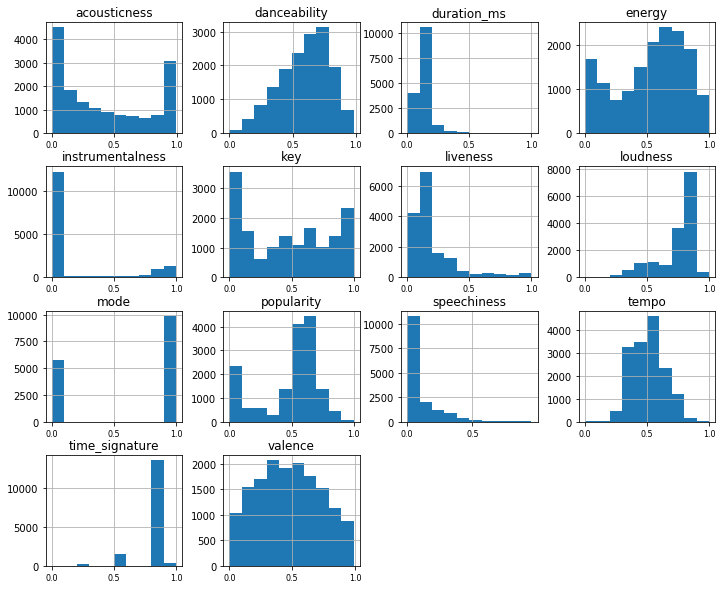

In [10]:
# Using the histogram, check that the scaling has worked
X.hist(xlabelsize=8, figsize=(12,10));

Conclusion: Yes, the scaling worked - all values range between 0 and 1. Now progress to Clustering

# Clustering

In [11]:
# These are the parameter settings from the documentation: 
# 

In [12]:
kmean3 = KMeans(n_clusters=3)
kmean3.fit(X)
print("Labels: ", kmean3.labels_)
print("\nCentroids: ", kmean3.cluster_centers_)
print("\nInertia: ", kmean3.inertia_)

Labels:  [1 1 0 ... 1 1 2]

Centroids:  [[5.74786255e-01 6.71397239e-01 6.53035876e-01 5.37049778e-01
  8.13482451e-01 2.44249065e-14 1.35320761e-01 2.61090189e-01
  3.87379569e-02 2.05701330e-01 5.24208470e-01 5.23395531e-01
  1.23972459e-01 7.92227449e-01]
 [5.59032169e-01 6.53269150e-01 6.43014179e-01 4.42397580e-01
  8.15261694e-01 1.00000000e+00 1.20091394e-01 2.74605944e-01
  2.62351090e-02 2.25304248e-01 5.17852252e-01 5.25151666e-01
  1.26984195e-01 7.87847127e-01]
 [2.29731447e-01 3.62774357e-01 1.39385281e-01 4.38794529e-01
  4.94022030e-01 7.56858215e-01 5.20949177e-02 9.36836434e-01
  6.44557354e-01 1.40485042e-01 3.17309420e-01 4.49018516e-01
  1.42532791e-01 7.32197517e-01]]

Inertia:  7454.556698454551


## Findings: ...